In [1]:
#Load modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


### Generate PCA plots

In [2]:
def plot_pca(meta, evr, i, name):
    
    fig, ax = plt.subplots(figsize=(4,4))
    
    ax.scatter(meta.loc[meta.geographic_cohort_shape=='circle', f'PC{i}'], 
               meta.loc[meta.geographic_cohort_shape=='circle', f'PC{i+1}'], 
               color=meta.loc[meta.geographic_cohort_shape=='circle', 'geographic_cohort_colour'], 
               marker='o', 
               edgecolor='k', 
               linewidth=.8
              )
    ax.scatter(meta.loc[meta.geographic_cohort_shape=='triangle-up', f'PC{i}'], 
               meta.loc[meta.geographic_cohort_shape=='triangle-up', f'PC{i+1}'], 
               color=meta.loc[meta.geographic_cohort_shape=='triangle-up', 'geographic_cohort_colour'], 
               marker='^', 
               edgecolor='k', 
               linewidth=.8)
    ax.set_yticks([0])
    ax.set_xticks([0])
    ax.set_ylabel(f'PC {i+1}: {evr[i]*100:.2f}%')
    ax.set_xlabel(f'PC {i}: {evr[i-1]*100:.2f}%')
    ax.set_title(f'{name}')
    plt.savefig(f"pcas/{name}_{i}_{i+1}.svg")

In [3]:
meta = pd.read_csv("pcas/PCA_all.tsv", sep='\t', index_col=0)
meta.head()

,sample_id,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,...,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,VBS24195,1229-GH-A-GH01,Samuel Dadzie,Ghana,Dimabi,2017,8,9.420,-1.083,F,...,17.335978,392.170560,-4.828117,13.167892,-3.358658,-0.943239,1.265006,-4.080645,4.194095,0.036339
1,VBS24196,1229-GH-A-GH02,Samuel Dadzie,Ghana,Gbullung,2017,7,9.488,-1.009,F,...,-16.785383,-51.545383,15.093560,1.192991,4.927580,3.884033,5.483262,26.366415,-4.769647,44.781597
2,VBS24197,1229-GH-A-GH03,Samuel Dadzie,Ghana,Dimabi,2017,7,9.420,-1.083,F,...,-16.187029,-40.041400,-13.127802,-6.924955,2.936362,3.502536,-3.644072,-6.529322,3.272416,-3.818514
3,VBS24198,1229-GH-A-GH04,Samuel Dadzie,Ghana,Dimabi,2017,8,9.420,-1.083,F,...,22.296328,488.883270,-73.554470,13.587123,0.199960,1.625081,-3.416288,-8.516673,2.985849,-5.431977
4,VBS24199,1229-GH-A-GH05,Samuel Dadzie,Ghana,Gupanarigu,2017,8,9.497,-0.952,F,...,16.134296,411.618600,-47.044487,6.901426,7.276990,-0.292836,1.513046,-6.161454,0.945428,-10.674298


In [8]:
meta.columns

Index(['sample_id', 'partner_sample_id', 'contributor', 'country', 'location',
       'year', 'month', 'latitude', 'longitude', 'sex_call', 'sample_set',
       'release', 'quarter', 'country_iso', 'admin1_name', 'admin1_iso',
       'admin2_name', 'taxon', 'cohort_admin1_year', 'cohort_admin1_month',
       'cohort_admin1_quarter', 'cohort_admin2_year', 'cohort_admin2_month',
       'cohort_admin2_quarter', 'geographic_cohort',
       'geographic_cohort_colour', 'geographic_cohort_shape', 'PCA_cohort',
       'PCA_cohort_colour', 'mitochondrial_id', 'karyotype_3La',
       'karyotype_3Ra', 'karyotype_3Rb', 'karyotype_2Ra', 'karyotype_2Rh',
       'median_coverage', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7',
       'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16'],
      dtype='object')

In [9]:
evr = np.load(f'pcas/evr_all.npy')
evr

array([0.03898313, 0.01638699, 0.01409051, 0.00857328, 0.00809698,
       0.00613308, 0.00413281, 0.00368473, 0.00316996, 0.00306626,
       0.00278303, 0.00277136, 0.00270294, 0.00262676, 0.00250468,
       0.00237115], dtype=float32)

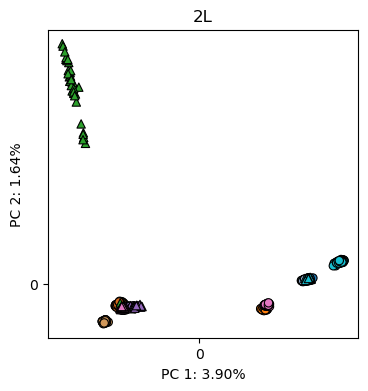

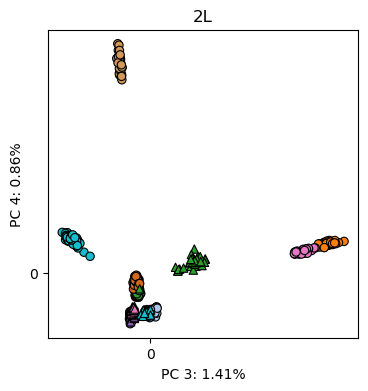

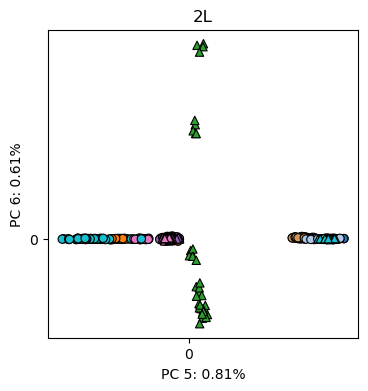

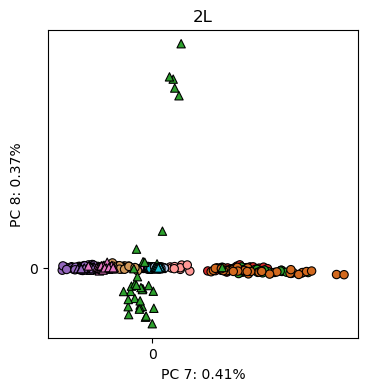

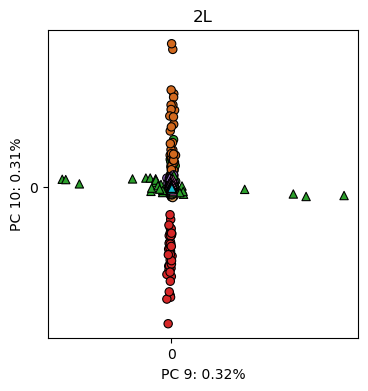

In [10]:
for i in [1, 3, 5, 7, 9]:
    plot_pca(meta, evr, i, '2L')

In [11]:
meta = pd.read_csv("pcas/PCA_equatorial.tsv", sep='\t', index_col=0)
evr = np.load(f'pcas/evr_equatorial.npy')

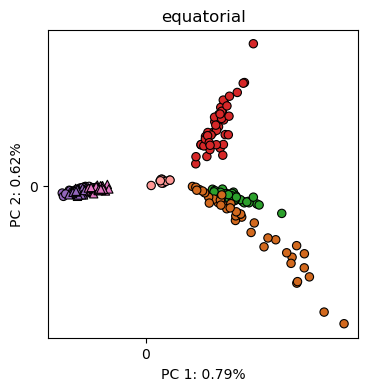

In [12]:
plot_pca(meta, evr, 1, 'equatorial')

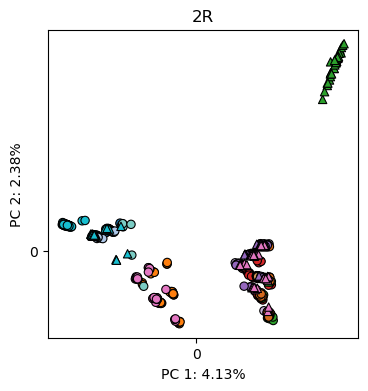

In [13]:
name = '2R'
meta = pd.read_csv(f"pcas/PCA_{name}.tsv", sep='\t', index_col=0)
evr = np.load(f'pcas/evr_{name}.npy')
plot_pca(meta, evr, 1, name)

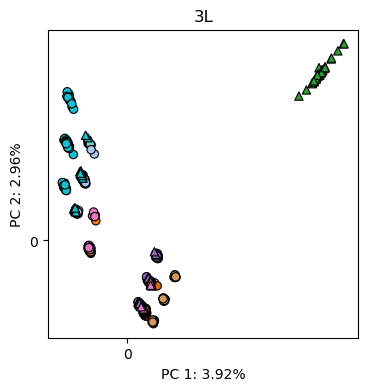

In [14]:
name = '3L'
meta = pd.read_csv(f"pcas/PCA_{name}.tsv", sep='\t', index_col=0)
evr = np.load(f'pcas/evr_{name}.npy')
plot_pca(meta, evr, 1, name)

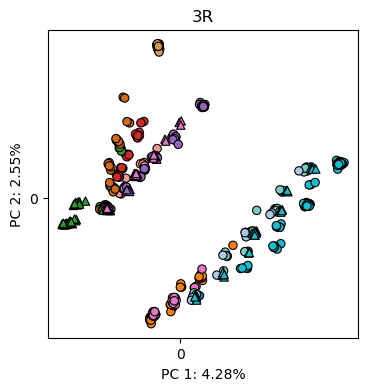

In [15]:
name = '3R'
meta = pd.read_csv(f"pcas/PCA_{name}.tsv", sep='\t', index_col=0)
evr = np.load(f'pcas/evr_{name}.npy')
plot_pca(meta, evr, 1, name)

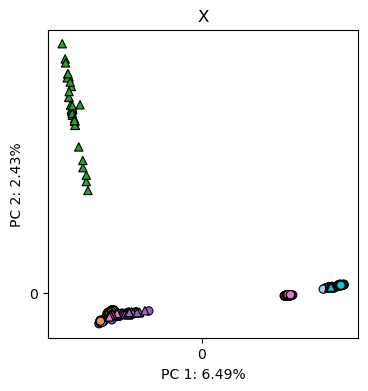

In [16]:
name = 'X'
meta = pd.read_csv(f"pcas/PCA_{name}.tsv", sep='\t', index_col=0)
evr = np.load(f'pcas/evr_{name}.npy')
plot_pca(meta, evr, 1, name)

### Subgroup PCA

In [4]:
def plot_pca_subgroup(meta, evr, i, name, figsize=(4,4)):
    
    fig, ax = plt.subplots(figsize=figsize)
    
    for shape in meta.geographic_cohort_shape.unique():
    
        ax.scatter(meta.loc[meta.geographic_cohort_shape==shape, f'PC{i}'], 
               meta.loc[meta.geographic_cohort_shape==shape, f'PC{i+1}'], 
               color=meta.loc[meta.geographic_cohort_shape==shape, 'geographic_cohort_colour'], 
               marker=markerdict[shape], 
               edgecolor='k', 
               linewidth=.8
              )

    ax.set_yticks([0])
    ax.set_xticks([0])
    ax.set_ylabel(f'PC {i+1}: {evr[i]*100:.2f}%')
    ax.set_xlabel(f'PC {i}: {evr[i-1]*100:.2f}%')
    ax.set_title(f'{name}')
    plt.savefig(f"pcas/{name}_{i}_{i+1}.svg")

In [18]:
evr = np.load("subgroup_explained_variance_2L.npy")
meta = pd.read_csv("subgroup_pca_2L.csv")
meta.tail()

,sample_id,geographic_cohort,geographic_cohort_colour,geographic_cohort_shape,PCA_cohort,PCA_cohort_colour,mitochondrial_id,karyotype_3La,karyotype_3Ra,karyotype_3Rb,...,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
702,SRR12281385,An_longipalpis,#000000,cross,NaN,NaN,NaN,NaN,NaN,NaN,...,-30.882515,-14.699215,-28.912935,7.395364,-37.020782,-54.798973,3.866526,-336.20660,1.941301,2.227424
703,SRR12281386,An_longipalpis,#000000,cross,NaN,NaN,NaN,NaN,NaN,NaN,...,-33.463665,-15.285809,-25.505676,6.948893,-32.613758,-56.600260,3.878979,-340.04623,0.640289,0.159135
704,SRR12281387,An_longipalpis,#000000,cross,NaN,NaN,NaN,NaN,NaN,NaN,...,-28.384924,-10.669159,-35.502590,6.772862,-37.938652,-57.168890,4.933291,-341.52652,0.753008,-1.164329
705,SRR12281388,An_longipalpis,#000000,cross,NaN,NaN,NaN,NaN,NaN,NaN,...,-27.601185,5.639288,-47.078888,8.435738,-35.497177,-52.880745,2.722103,-324.59583,-0.523244,2.081573
706,SRR12281389,An_longipalpis,#000000,cross,NaN,NaN,NaN,NaN,NaN,NaN,...,-32.748360,-12.007555,-30.842160,6.597592,-33.516760,-54.760790,5.723918,-336.27747,-1.253930,-2.315374


In [12]:
markerdict=dict({'triangle-up': '^', 
                 'circle': 'o', 
                 'cross': 'P', 
                 'square': 's', 
                 'star': '*', 
                 'bowtie': 'd'})

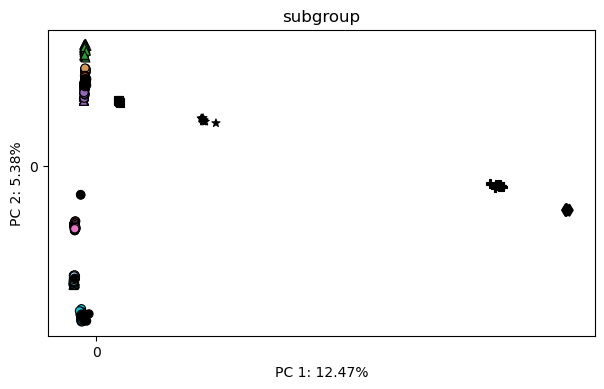

In [27]:
plot_pca_subgroup(meta, evr, 1, 'subgroup', figsize=(7.05,3.975))

### Kiribina Folonzo PCA

In [5]:
name = 'Fol_Kir_EQ_BJ_GH'
meta = pd.read_csv(f"pcas/PCA_{name}.tsv", sep='\t', index_col=0)

In [10]:
#change back colour
meta.loc[meta.geographic_cohort=='BurkinaFaso_Kiribina', 
         'geographic_cohort_colour'] = '#98df8a'

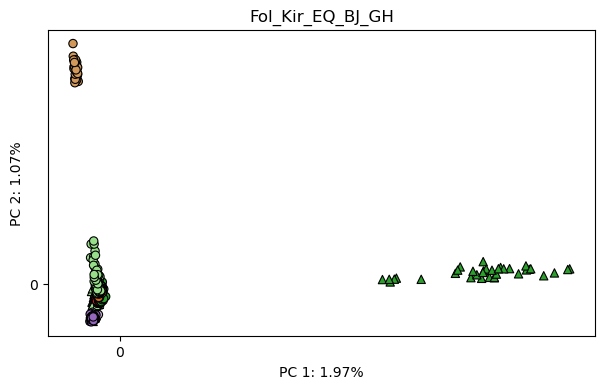

In [13]:
#name = 'Fol_Kir_EQ_BJ_GH'
#meta = pd.read_csv(f"pcas/PCA_{name}.tsv", sep='\t', index_col=0)
evr = np.load(f'pcas/evr_{name}.npy')
plot_pca_subgroup(meta, evr, 1, name, figsize=(7.05,3.975))

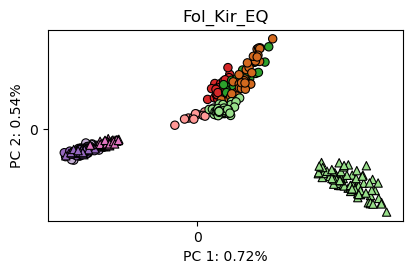

In [14]:
name = 'Fol_Kir_EQ'
meta = pd.read_csv(f"pcas/PCA_{name}.tsv", sep='\t', index_col=0)
#change back colour
meta.loc[meta.geographic_cohort=='BurkinaFaso_Kiribina', 
         'geographic_cohort_colour'] = '#98df8a'
evr = np.load(f'pcas/evr_{name}.npy')
plot_pca_subgroup(meta, evr, 1, name, figsize=(4.575,2.475))

### For inversion regions

In [18]:
def plot_pca_inv(i, name):
    
    meta = pd.read_csv(f"pcas/PCA_{name}.tsv", sep='\t', index_col=0)
    evr = np.load(f"pcas/evr_{name}.npy")
    
    fig, ax = plt.subplots(figsize=(4,4))
    
    colordict = dict({
        f'{name}/{name[2]}': '#F59D2E',
        f'{name[:2]}+/{name[2]}': '#71a354', 
        f'{name[:2]}+/+': '#60689E',
        #extend with exceptional values
        '2R?+/a': '#71a354',
        '2R?+/+': '#60689E',
        np.nan: 'grey'
    })
    ax.scatter(meta[f'PC{i}'], 
               meta[f'PC{i+1}'], 
               c=meta[f'karyotype_{name}'].map(colordict).values,
               marker='o', 
               s=60,
               #edgecolor='k', 
               #linewidth=.8
              )

    ax.set_yticks([0])
    ax.set_xticks([0])
    ax.set_ylabel(f'PC {i+1}: {evr[i]*100:.2f}%')
    ax.set_xlabel(f'PC {i}: {evr[i-1]*100:.2f}%')
    ax.set_title(f'{name}')
    plt.savefig(f"pcas/{name}_{i}_{i+1}_nb.svg")

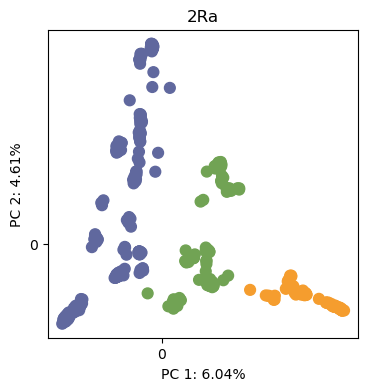

In [20]:
plot_pca_inv(1, '2Ra')

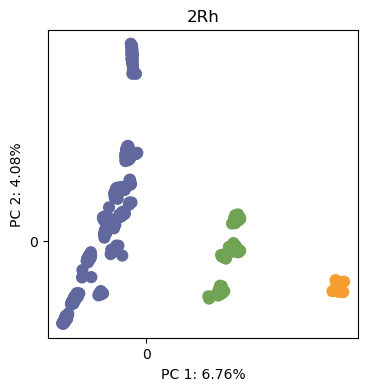

In [21]:
plot_pca_inv(1, '2Rh')

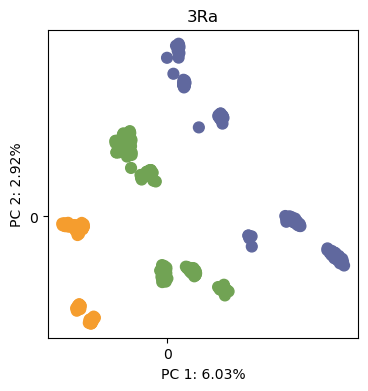

In [22]:
plot_pca_inv(1, '3Ra')

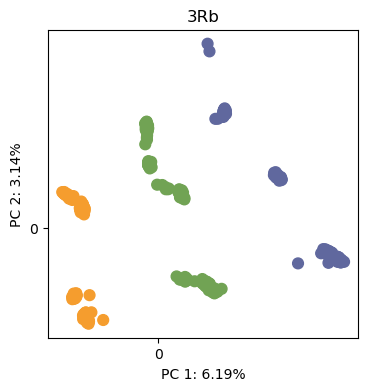

In [23]:
plot_pca_inv(1, '3Rb')

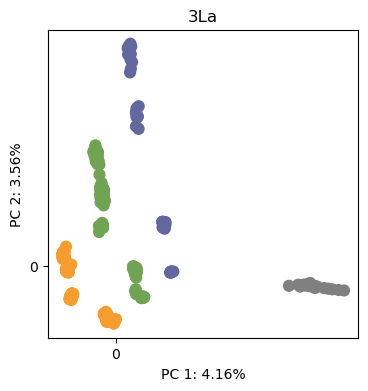

In [19]:
plot_pca_inv(1, '3La')

In [27]:
def plot_pca_inv_2Rt(pcx, pcy, name):
    
    meta = pd.read_csv(f"pcas/PCA_{name}.tsv", sep='\t', index_col=0)
    evr = np.load(f"pcas/evr_{name}.npy")
    
    fig, ax = plt.subplots(figsize=(6.7,3.3))
    
    colordict = dict({
    '2R+/+2R+/+': '#E5FCC3',
    '2R+/a2R+/+': '#44ADAA',
    '2Ra/a2R+/+': '#5B4F50',
    '2R+/+2R+/h': '#FBD521',
    '2R+/+2Rh/h': '#EB1D4C',
    '2R+/a2R+/h': '#A5236E',
    
    '2R?+/+2R+/+': '#03C04A',
    '2R?+/a2R+/+': '#234F1E',
    '2R?+/+2R+/h': '#03C04A',
    '2R?+/+2Rh/h': '#03C04A',
    '2R?+/a2R+/h': '#234F1E'
    })
    ax.scatter(meta[f'PC{pcx}'], 
               meta[f'PC{pcy}'], 
               c=(meta['karyotype_2Ra']+meta['karyotype_2Rh']).map(colordict).values,
               marker='o', 
               s=60,
               #edgecolor='k', 
               #linewidth=.8
              )

    ax.set_yticks([0])
    ax.set_xticks([0])
    ax.set_ylabel(f'PC {pcy}: {evr[pcy-1]*100:.2f}%')
    ax.set_xlabel(f'PC {pcx}: {evr[pcx-1]*100:.2f}%')
    ax.set_title('2R: 18.0-29.45 Mb')
    plt.savefig(f"pcas/{name}_pc{pcx}_pc{pcy}.svg")

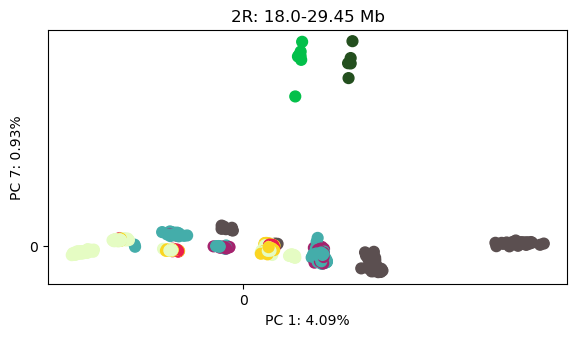

In [28]:
plot_pca_inv_2Rt(1,7, '2Rt')

### Double recombinants

In [56]:
def plot_pca_inv_dr(i, name, inv, sample_idx):
    
    meta = pd.read_csv(f"pcas/PCA_{name}.tsv", sep='\t', index_col=0)
    evr = np.load(f"pcas/evr_{name}.npy")
    
    fig, ax = plt.subplots(figsize=(4,4))
    
    colordict = dict({
        f'{inv}/{inv[2]}': '#F59D2E',
        f'{inv[:2]}+/{inv[2]}': '#71a354', 
        f'{inv[:2]}+/+': '#60689E',
        #extend with exceptional values
        '2R?+/a': '#71a354',
        '2R?+/+': '#60689E',
        np.nan: 'grey'
    })
    ax.scatter(meta[f'PC{i}'], 
               meta[f'PC{i+1}'], 
               c=meta[f'karyotype_{inv}'].map(colordict).values,
               marker='o', 
               s=40,
               #edgecolor='k', 
               #linewidth=.8
              )
    for idx in sample_idx:
        ax.scatter(meta.loc[idx, f'PC{i}'], 
               meta.loc[idx, f'PC{i+1}'], 
               c=colordict[meta.loc[idx, f'karyotype_{inv}']],
               marker='o', 
               s=60,
               edgecolor='k', 
               linewidth=1
              )

    ax.set_yticks([0])
    ax.set_xticks([0])
    ax.set_ylabel(f'PC {i+1}: {evr[i]*100:.2f}%')
    ax.set_xlabel(f'PC {i}: {evr[i-1]*100:.2f}%')
    ax.set_title(f'Double recombinants 3La: {name[3:5]}.{name[5]} - {name[7:9]}.{name[9]} Mb')
    plt.savefig(f"pcas/{name}_{i}_{i+1}.svg")

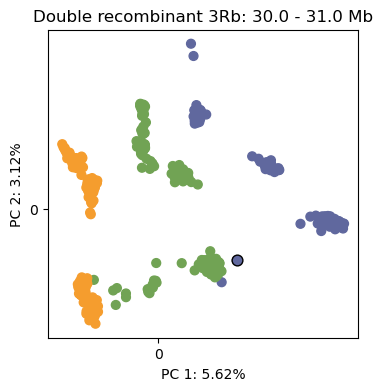

In [32]:
plot_pca_inv_dr(1, 'dr_300_310', '3Rb', [561])

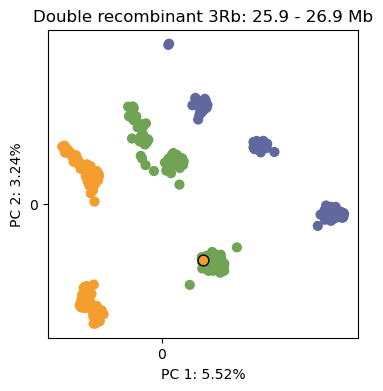

In [34]:
plot_pca_inv_dr(1, 'dr_259_269', '3Rb', [73])

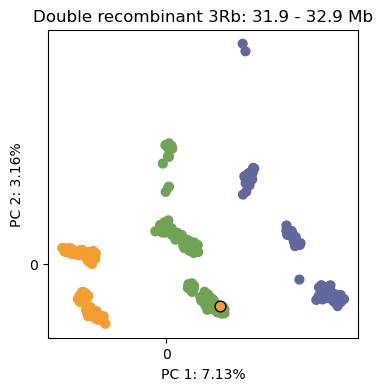

In [35]:
plot_pca_inv_dr(1, 'dr_319_329', '3Rb', [487])

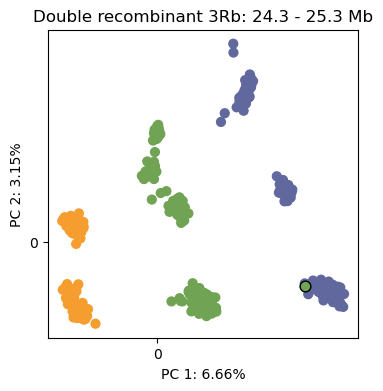

In [36]:

plot_pca_inv_dr(1, 'dr_243_253', '3Rb', [190])

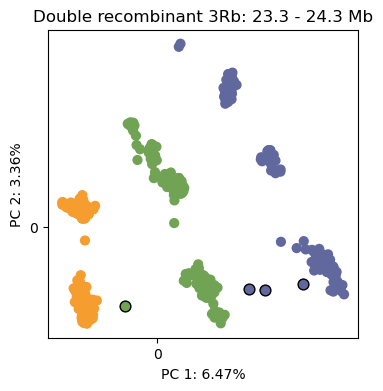

In [37]:
plot_pca_inv_dr(1, 'dr_233_243', '3Rb', 
               [538,553,182,499])

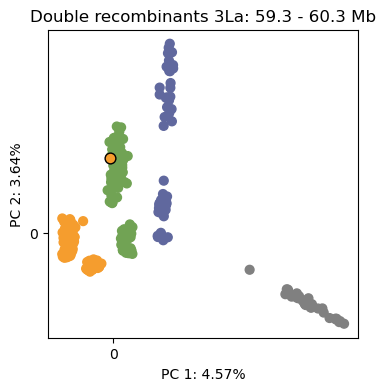

In [57]:
plot_pca_inv_dr(1, 'dr_593_603', '3La', [558])

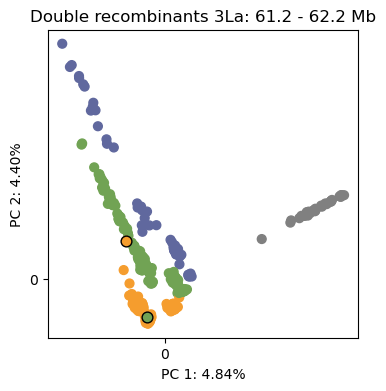

In [58]:
plot_pca_inv_dr(1, 'dr_612_622', '3La', [295, 519])

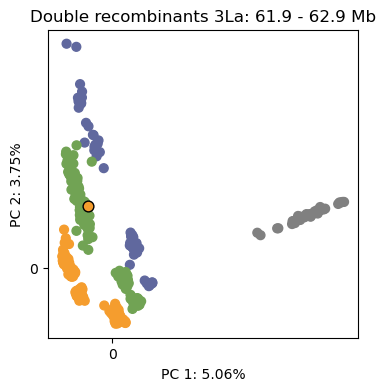

In [59]:
plot_pca_inv_dr(1, 'dr_619_629', '3La', [400])

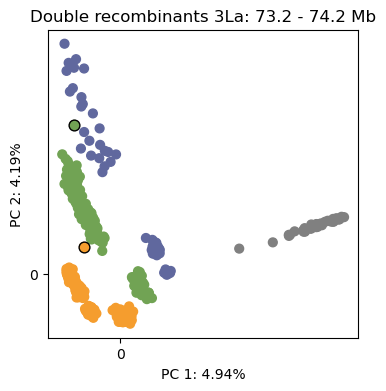

In [60]:
plot_pca_inv_dr(1, 'dr_732_742', '3La', [363, 511])

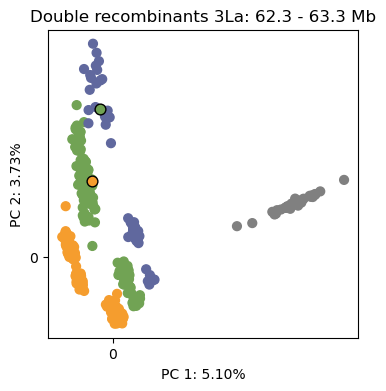

In [61]:
plot_pca_inv_dr(1, 'dr_623_633', '3La', [175, 400])

### 3Ra 2d window

In [53]:
def plot_pca_2dwindow(meta, evr, i, name):
    
    fig, ax = plt.subplots(figsize=(4,4))
    
    ax.scatter(meta.loc[meta.karyotype_3Ra == '3R+/+', f'PC{i}'], 
               meta.loc[meta.karyotype_3Ra == '3R+/+', f'PC{i+1}'], 
               color=meta.loc[meta.karyotype_3Ra == '3R+/+', 'geographic_cohort_colour'], 
               marker='o', 
               edgecolor='k', 
               linewidth=.8, 
               s=50
              )
    ax.scatter(meta.loc[meta.karyotype_3Ra == '3R+/a', f'PC{i}'], 
               meta.loc[meta.karyotype_3Ra == '3R+/a', f'PC{i+1}'], 
               color=meta.loc[meta.karyotype_3Ra == '3R+/a', 'geographic_cohort_colour'], 
               marker='P', 
               edgecolor='k', 
               linewidth=.8, 
              s=50)
    ax.scatter(meta.loc[meta.karyotype_3Ra == '3Ra/a', f'PC{i}'], 
               meta.loc[meta.karyotype_3Ra == '3Ra/a', f'PC{i+1}'], 
               color=meta.loc[meta.karyotype_3Ra == '3Ra/a', 'geographic_cohort_colour'], 
               marker='^', 
               edgecolor='k', 
               linewidth=.8, 
              s=50)
    ax.set_yticks([0])
    ax.set_xticks([0])
    ax.set_ylabel(f'PC {i+1}: {evr[i]*100:.2f}%')
    ax.set_xlabel(f'PC {i}: {evr[i-1]*100:.2f}%')
    ax.set_title(f'{name}')
    plt.savefig(f"pcas/{name}.svg")

In [51]:
name = '3Ra_5_6'
pmeta = pd.read_csv(f'pcas/PCA_{name}.tsv', sep='\t')
evr = np.load(f'pcas/evr_{name}.npy')
smeta = pmeta.loc[pmeta.geographic_cohort.isin(['Malawi_Southern-Region', 
                                'Cameroon_Adamawa'])]

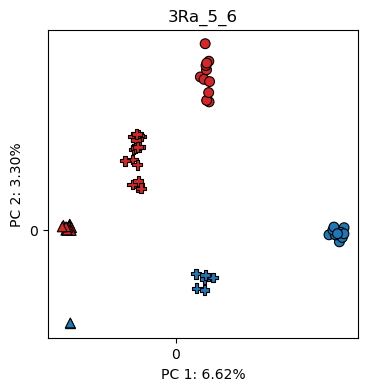

In [54]:
plot_pca_2dwindow(smeta, evr, 1, name)